In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


data = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

In [2]:
#getting columns & rows
print(data.shape)
print(data.columns)
print(data.info())


(5110, 12)
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes:

In [3]:
# check for numm values 
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [4]:
data.fillna({'bmi': data['bmi'].mean()},inplace=True)
print(data.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [5]:
# Standardize numeric types & one hot encoding for all non-numeric values
print (data["gender"].unique())
print(data["ever_married"].unique())
print(data["work_type"].unique())
print(data["Residence_type"].unique())
print(data["smoking_status"].unique())

label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])

data['work_type'] = label_encoder.fit_transform(data['work_type'])

data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

print(data)


['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0       

In [6]:
x = data.drop(['stroke','id'], axis=1)
print("features ", x)
y = data['stroke']
print("target ", y)


features        gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  
0       

In [7]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

accuracy : 0.91
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.21      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



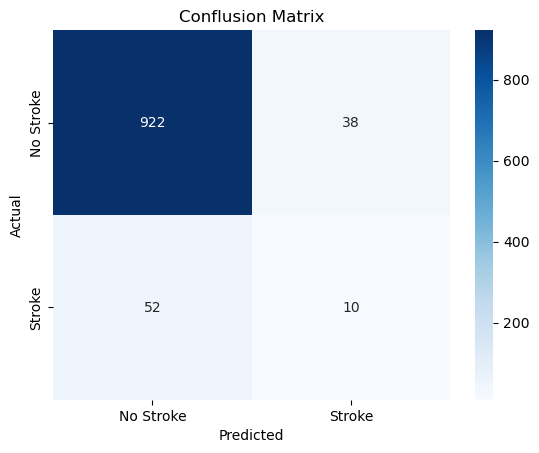

In [8]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy : {accuracy:.2f}")

print(classification_report(y_test,y_pred))

confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='Blues',
            xticklabels=['No Stroke','Stroke'],
            yticklabels=['No Stroke','Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Conflusion Matrix')
plt.show()

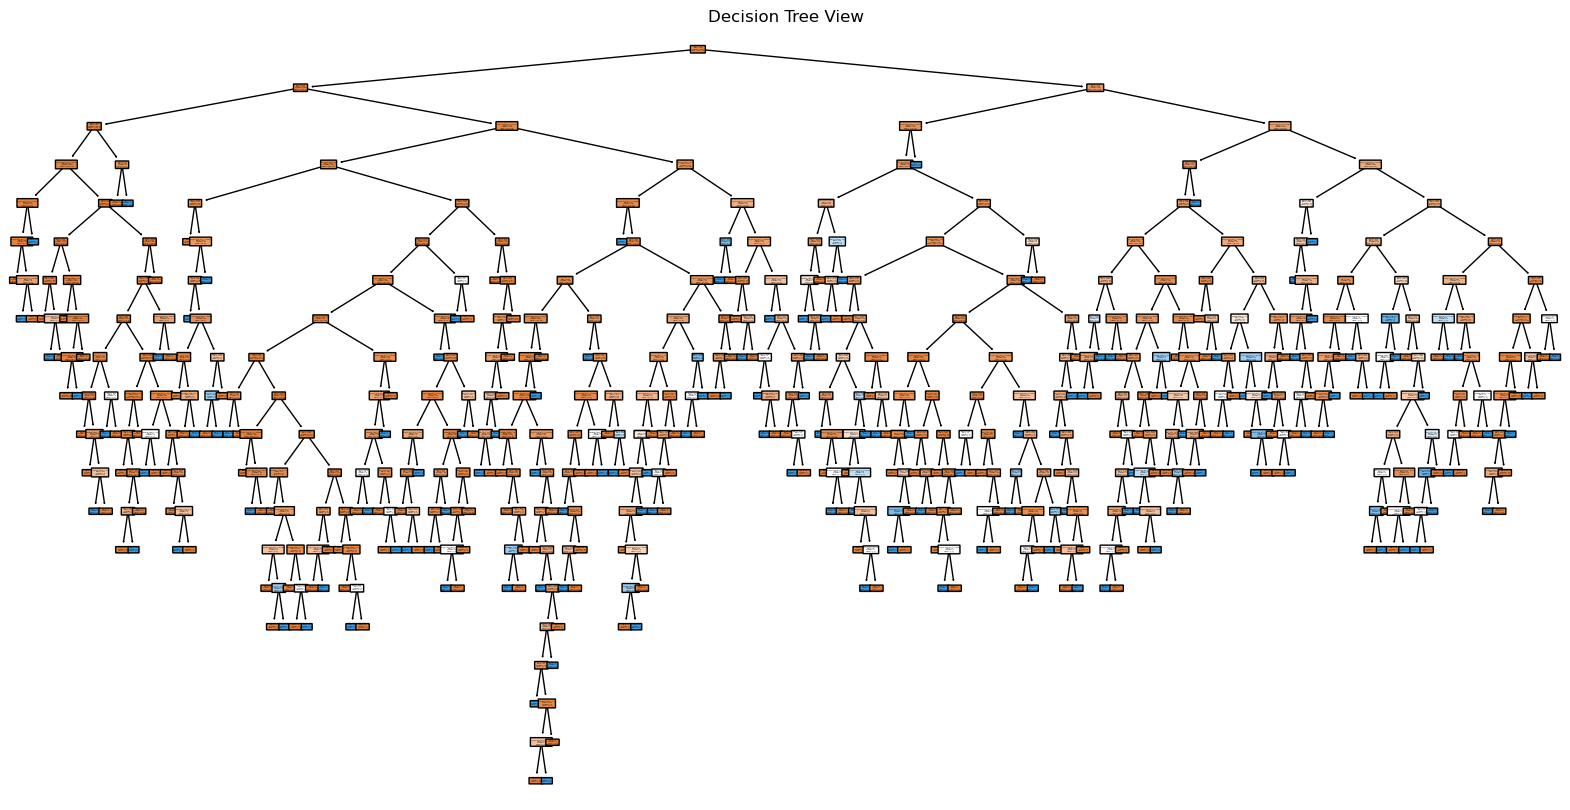

In [9]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['No Stroke', 'Stroke'], rounded=True)
plt.title('Decision Tree View')
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'max_depth':[5,10,15,20,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]

}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),params_grid,cv=5)

grid_search.fit(x_train,y_train)

print(f" Hyper Paramters {grid_search.best_params_}")
best_model= grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

accuracy_test = accuracy_score(y_test,y_pred_best)

print (f" model accuracy {accuracy_test:.2f}")

 Hyper Paramters {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
 model accuracy 0.94
